## Will Paz

In [1]:
import numpy as np
from matplotlib import pyplot as plt, image
from scipy import ndimage
from numpy.linalg import svd

In [2]:
def imsplit(image):
    return image[:,:,0],image[:,:,1],image[:,:,2]

def imjoin(R,G,B):
    m,n = R.shape
    image = np.ndarray(shape=(m,n,3),dtype=float)
    image[:,:,0] = R
    image[:,:,1] = G
    image[:,:,2] = B
    return image

#### Question: Based on these images and the plots you made with rankplot1 and rankplot2, which seems the more reasonable function to use if our real goal is to graph rank vs. 'clarity' of the image?

Consider the plot created using rankplot1 with image of rank 5:

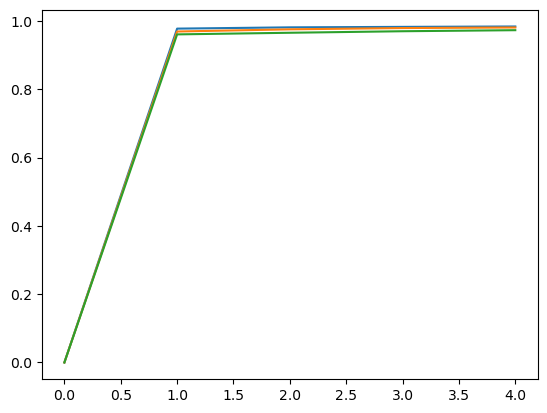

As shown in the image, each of the varience of each of the color components are closer together and thus showing how the varience is approximately equally compensated in each of the color components. Next, to compare that the plot created using rankplot2, which is as follows:

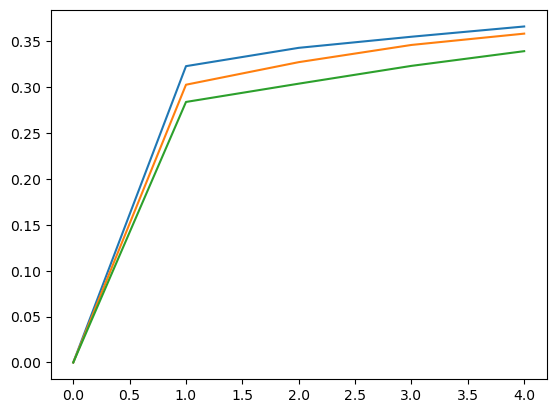

As we're using standard deviation rather than varience, there is a greater difference in the effect created by each of the color components. That is why it is more reasonable to use rankplot1 as a stepping stone to our real goal to "optimize" the correlation between rank and 'clarity'

In [3]:
def rankplot1(picture,rank):
    """
     As the user inputs an image and we will output three plots with the x values being 
     [0,1,2,...,rank] and y[i] is the percent of varience captured by the first i singular values.
     We will do this for all three of the colors (red,green,blue).
     
     Input(s): An image and desired rank
     
     Outputs: One plot with three graphs, one red, one green, and one blue and the y vectors.
     
     Note: The red plot (for example) should have x values [0,1,2,....,rank] and 
     the y[i] value should be the "percentage of variance" captured by the 
     first i singular values, i.e. np.sum(S[0:i]**2)/np.sum(S**2). 
     Don't plot points but a continuous plot--it will be better for what we want to do.
     
    """
    x = np.arange(rank)
    
    rawim = image.imread(picture)
    im = rawim.copy()
    im = (1/255)*im
    R,G,B = imsplit(im)
    
    _,SR,_ = svd(R, full_matrices=False)
    _,SG,_ = svd(G, full_matrices=False)
    _,SB,_ = svd(B, full_matrices=False)
    
    pct_var_SR = np.zeros(rank)
    pct_var_SG = np.zeros(rank)
    pct_var_SB = np.zeros(rank)
    
    for i in range(0,rank):
        pct_var_SR[i] = np.sum(SR[0:i]**2)/np.sum(SR**2) 
        pct_var_SG[i] = np.sum(SG[0:i]**2)/np.sum(SG**2)
        pct_var_SB[i] = np.sum(SB[0:i]**2)/np.sum(SB**2)
        
    plt.plot(x, pct_var_SR, label='Red')
    plt.plot(x, pct_var_SG, label='Green')
    plt.plot(x, pct_var_SB, label='Blue')
    
    return plt.show(), pct_var_SR, pct_var_SG, pct_var_SB

In [4]:
def rankplot2(picture,rank):
    """
    As the user inputs an image and we will output three plots with the x values being 
    [0,1,2,...,rank] and y[i] is the standard deviation captured by the first i singular values.
    We will do this for all three of the colors (red,green,blue).
     
    Input(s): An image
     
    Outputs: One plot with three graphs, one red, one green, and one blue and the y vector.
     
    Note: replace np.sum(S[0:i]**2)/np.sum(S**2) with np.sum(S[0:i])/np.sum(S)
    """
    x = np.arange(rank)
        
    rawim = image.imread(picture)
    im = rawim.copy()
    im = (1/255)*im
    R,G,B = imsplit(im)
    
    _,SR,_ = svd(R, full_matrices=False)
    _,SG,_ = svd(G, full_matrices=False)
    _,SB,_ = svd(B, full_matrices=False)

    pct_var_SR = np.zeros(rank)
    pct_var_SG = np.zeros(rank)
    pct_var_SB = np.zeros(rank)
    
    for i in range(0,rank):
        pct_var_SR[i] = np.sum(SR[0:i])/np.sum(SR) 
        pct_var_SG[i] = np.sum(SG[0:i])/np.sum(SG)
        pct_var_SB[i] = np.sum(SB[0:i])/np.sum(SB)
        
    plt.plot(x, pct_var_SR, label='Red')
    plt.plot(x, pct_var_SG, label='Green')
    plt.plot(x, pct_var_SB, label='Blue')

    return plt.show(), pct_var_SR, pct_var_SG, pct_var_SB